<a href="https://colab.research.google.com/github/Juliana001/AnaliseDeDados_projetosPessoais/blob/main/AnaliseENADE2023/clusterizacaoENADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![Juliana](https://drive.google.com/uc?export=view&id=1PRtZkH3XKEHD7ROx0NvjS8SkubI-RKdu)


###Este projeto teve início com foco em Business Intelligence, voltado à visualização de dados do ENADE 2023, mas evoluiu para uma abordagem mais ampla de Ciência de Dados e Engenharia de Dados. Nesta segunda etapa, o objetivo principal foi a clusterização dos dados. Para isso, realizei um processo completo de preparação, que incluiu a remoção de colunas com baixa relevância analítica, a transformação de variáveis categóricas em valores numéricos e a criação de um dicionário de dados para manter a relação entre os valores codificados e as tabelas previamente tratadas. Também foi necessário corrigir os tipos de algumas variáveis, convertendo dados interpretados como string para float, devido ao uso de vírgula como separador decimal. A definição da quantidade ideal de clusters foi realizada por meio do método do cotovelo, garantindo uma segmentação mais eficiente e coerente dos dados.

#1 - importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from math import sqrt

#2 - importar o dataset

In [ ]:
data = pd.read_csv('/content/endadeComNota.csv')
display(data)

,ano,codigoArea,areaAvaliacao,grauAcademico,codigoIES,nomeIES,siglaIES,organizacaoAcademica,categoriaAdministrativa,codigoCurso,...,siglaUF,qtdConcluintesInscritos,qtdConcluintesParticipantes,notaBrutaFG,notaPadronizadaFG,notaBrutaCE,notaPadronizadaCE,conceitoEnadeContinuo,conceitoEnadeFaixa,beneficenteAssistenciaSocialCEBAS
0,2023,6002.0,ENGENHARIA DE ALIMENTOS,Bacharelado,699.0,FUNDAÇÃO UNIVERSIDADE FEDERAL DE RONDÔNIA,UNIR,Universidade,Pública Federal,116776.0,...,RO,4.0,4.0,"50,55","2,123411382","42,75","2,107348703","2,111364373",3,-
1,2023,17.0,AGRONOMIA,Bacharelado,4785.0,INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...,IFRO,"Instituto Federal de Educação, Ciência e Tecno...",Pública Federal,1427412.0,...,RO,34.0,34.0,"48,33529412","2,79870416","56,88529412","3,309191089","3,181569357",4,-
2,2023,5710.0,ENGENHARIA CIVIL,Bacharelado,4613.0,Centro Universitário FAEMA,UNIFAEMA,Centro Universitário,Privada com fins lucrativos,1259888.0,...,RO,24.0,21.0,"47,82857143","2,296813462","31,13809524","1,59527528","1,770659825",2,-
3,2023,23.0,ENFERMAGEM,Bacharelado,4613.0,Centro Universitário FAEMA,UNIFAEMA,Centro Universitário,Privada com fins lucrativos,104306.0,...,RO,35.0,34.0,"46,49705882","2,348003123","44,67352941","1,596814508","1,784611662",2,-
4,2023,19.0,FARMÁCIA,Bacharelado,4613.0,Centro Universitário FAEMA,UNIFAEMA,Centro Universitário,Privada com fins lucrativos,104308.0,...,RO,23.0,23.0,"40,16956522","1,417747523","32,63478261","0,799276435","0,953894207",2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,2023,5.0,MEDICINA VETERINÁRIA,Bacharelado,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,18031.0,...,DF,118.0,108.0,"60,58611111","4,054079669","58,14166667","3,826283118","3,883232255",4,-
9376,2023,19.0,FARMÁCIA,Bacharelado,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,112794.0,...,DF,95.0,92.0,"55,76847826","3,548880944","57,88043478","3,817083986","3,750033225",4,-
9377,2023,23.0,ENFERMAGEM,Bacharelado,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,112818.0,...,DF,79.0,74.0,"64,46351351","4,572528665","70,25135135","4,318438464","4,381961014",5,-
9378,2023,5902.0,ENGENHARIA MECÂNICA,Bacharelado,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,138.0,...,DF,76.0,64.0,"60,1828125","3,857397611","56,3875",5,"4,714349403",5,-


#Vamos precisar trocar os dados de string e retirar algumas colunas que não serão necessárias

* Remoção da coluna área avaliada, pois essa informação já está representada pelo código de área.

* Exclusão do código da IES, por se tratar apenas de um identificador.

* Remoção do nome da IES e da sigla da IES, por não agregarem valor analítico ao modelo.

* Exclusão da coluna município do curso.

* Transformação das variáveis categóricas em valores numéricos:

  *  Organização acadêmica

  * Categoria administrativa

  * Sigla da UF

  * Grau acadêmico

  * CEBAS

* Padronização das variáveis numéricas: substituição da vírgula por ponto como separador decimal nas notas, seguida da conversão do tipo de dado de string para float.

#3 - transformação dos dados

In [ ]:
data = data.drop(columns=['areaAvaliacao', 'codigoIES', 'nomeIES', 'siglaIES', 'municipioDoCurso'])

#Dicionário dos cursos
    60020: "ENGENHARIA DE ALIMENTOS",
    170: "AGRONOMIA",
    57100: "ENGENHARIA CIVIL",
    230: "ENFERMAGEM",
    190: "FARMÁCIA",
    360: "FISIOTERAPIA",
    210: "ARQUITETURA E URBANISMO",
    280: "NUTRIÇÃO",
    950: "TECNOLOGIA EM ESTÉTICA E COSMÉTICA",
    550: "BIOMEDICINA",
    60: "ODONTOLOGIA",
    510: "ZOOTECNIA",
    900: "TECNOLOGIA EM AGRONEGÓCIOS",
    50: "MEDICINA VETERINÁRIA",
    120: "MEDICINA",
    58060: "ENGENHARIA ELÉTRICA",
    920: "TECNOLOGIA EM GESTÃO AMBIENTAL",
    64050: "ENGENHARIA FLORESTAL",
    63070: "ENGENHARIA AMBIENTAL",
    64110: "ENGENHARIA DE COMPUTAÇÃO I",
    59020: "ENGENHARIA MECÂNICA",
    58140: "ENGENHARIA DE CONTROLE E AUTOMAÇÃO",
    62080: "ENGENHARIA DE PRODUÇÃO",
    270: "FONOAUDIOLOGIA",
    60080: "ENGENHARIA QUÍMICA",
    690: "TECNOLOGIA EM RADIOLOGIA",
    64100: "TECNOLOGIA EM SEGURANÇA NO TRABALHO",
    910: "TECNOLOGIA EM GESTÃO HOSPITALAR"

In [ ]:
codigoGrau = {
    'Bacharelado': 1,
    'Tecnológico': 2

}
data['grauAcademico'] = data['grauAcademico'].map(codigoGrau)

In [ ]:
map_tipo_ies = {
    'Universidade': 1,
    'Instituto Federal de Educação, Ciência e Tecnologia': 2,
    'Centro Universitário': 3,
    'Faculdade': 4,
    'Centro Federal de Educação Tecnológica': 5
}
data['organizacaoAcademica'] = data['organizacaoAcademica'].map(map_tipo_ies)

In [ ]:
#verificando se deu tudo certo
data['organizacaoAcademica'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
map_categoria_ies = {
    'Pública Federal': 1,
    'Pública Estadual': 2,
    'Pública Municipal': 3,
    'Privada com fins lucrativos': 4,
    'Privada sem fins lucrativos': 5,
    'Comunitária/Confessional': 6,
    'Especial': 7
}

data['categoriaAdministrativa'] = data['categoriaAdministrativa'].map(map_categoria_ies)

In [ ]:
map_uf_ibge = {
    'RO': 11,
    'AC': 12,
    'AM': 13,
    'RR': 14,
    'PA': 15,
    'AP': 16,
    'TO': 17,
    'MA': 21,
    'PI': 22,
    'CE': 23,
    'RN': 24,
    'PB': 25,
    'PE': 26,
    'AL': 27,
    'SE': 28,
    'BA': 29,
    'MG': 31,
    'ES': 32,
    'RJ': 33,
    'SP': 35,
    'PR': 41,
    'SC': 42,
    'RS': 43,
    'MS': 50,
    'MT': 51,
    'GO': 52,
    'DF': 53
}

data['siglaUF'] = data['siglaUF'].map(map_uf_ibge)


In [ ]:
modalidadeEnsino = {
    'Educação Presencial': 1,
    'Educação a Distância': 2

}
data['modalidadeEnsino'] = data['modalidadeEnsino'].map(modalidadeEnsino)

In [ ]:
cebas = {
    '-': 1,
    'X': 2

}
data['beneficenteAssistenciaSocialCEBAS'] = data['beneficenteAssistenciaSocialCEBAS'].map(cebas)

In [ ]:
data['beneficenteAssistenciaSocialCEBAS'].unique()

array([1, 2])

In [ ]:
display(data)

,ano,codigoArea,grauAcademico,organizacaoAcademica,categoriaAdministrativa,codigoCurso,modalidadeEnsino,codigoMunicipio,siglaUF,qtdConcluintesInscritos,qtdConcluintesParticipantes,notaBrutaFG,notaPadronizadaFG,notaBrutaCE,notaPadronizadaCE,conceitoEnadeContinuo,conceitoEnadeFaixa,beneficenteAssistenciaSocialCEBAS
0,2023,6002.0,1,1,1,116776.0,1,1100023.0,11,4.0,4.0,"50,55","2,123411382","42,75","2,107348703","2,111364373",3,1
1,2023,17.0,1,2,1,1427412.0,1,1100023.0,11,34.0,34.0,"48,33529412","2,79870416","56,88529412","3,309191089","3,181569357",4,1
2,2023,5710.0,1,3,4,1259888.0,1,1100023.0,11,24.0,21.0,"47,82857143","2,296813462","31,13809524","1,59527528","1,770659825",2,1
3,2023,23.0,1,3,4,104306.0,1,1100023.0,11,35.0,34.0,"46,49705882","2,348003123","44,67352941","1,596814508","1,784611662",2,1
4,2023,19.0,1,3,4,104308.0,1,1100023.0,11,23.0,23.0,"40,16956522","1,417747523","32,63478261","0,799276435","0,953894207",2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,2023,5.0,1,1,1,18031.0,1,5300108.0,53,118.0,108.0,"60,58611111","4,054079669","58,14166667","3,826283118","3,883232255",4,1
9376,2023,19.0,1,1,1,112794.0,1,5300108.0,53,95.0,92.0,"55,76847826","3,548880944","57,88043478","3,817083986","3,750033225",4,1
9377,2023,23.0,1,1,1,112818.0,1,5300108.0,53,79.0,74.0,"64,46351351","4,572528665","70,25135135","4,318438464","4,381961014",5,1
9378,2023,5902.0,1,1,1,138.0,1,5300108.0,53,76.0,64.0,"60,1828125","3,857397611","56,3875",5,"4,714349403",5,1


In [ ]:
#trocando a virgula pelo ponto
data['conceitoEnadeContinuo'] = data['conceitoEnadeContinuo'].str.replace(',', '.', regex=False)

In [ ]:
data['conceitoEnadeContinuo']

,conceitoEnadeContinuo
0,2.111364373
1,3.181569357
2,1.770659825
3,1.784611662
4,0.953894207
...,...
9375,3.883232255
9376,3.750033225
9377,4.381961014
9378,4.714349403


In [ ]:
data['conceitoEnadeContinuo']=data['conceitoEnadeContinuo'].astype(float)

In [ ]:
#usei para verificar se estava trocando certinho
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ano                                9380 non-null   int64  
 1   codigoArea                         9380 non-null   int64  
 2   grauAcademico                      9380 non-null   int64  
 3   organizacaoAcademica               9380 non-null   int64  
 4   categoriaAdministrativa            9380 non-null   int64  
 5   codigoCurso                        9380 non-null   float64
 6   modalidadeEnsino                   9380 non-null   int64  
 7   codigoMunicipio                    9380 non-null   float64
 8   siglaUF                            9380 non-null   int64  
 9   qtdConcluintesInscritos            9380 non-null   float64
 10  qtdConcluintesParticipantes        9380 non-null   float64
 11  notaBrutaFG                        9380 non-null   float

#4 - método cotovelo para clusterização

In [ ]:
padronizador = StandardScaler()
dadosPadronizados = padronizador.fit_transform(data)

In [ ]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [ ]:
wcss = calculate_wcss(data)

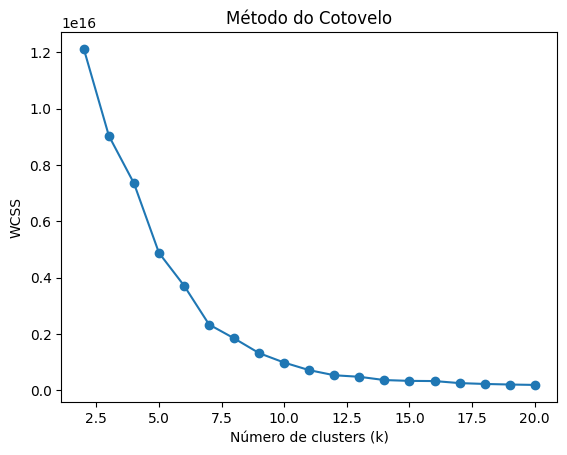

In [ ]:
k_values = range(2, 21)

plt.figure()
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()


In [ ]:

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerator = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator / denominator)

    return distances.index(max(distances)) + 2


In [ ]:
n = optimal_number_of_clusters(wcss)

#5 - clusterização

In [ ]:
kmeans = KMeans(n_clusters=n)
kmeans.fit(data)

KMeans(n_clusters=7)

In [ ]:
data['cluster'] = kmeans.labels_

In [ ]:
display(data)

,ano,codigoArea,grauAcademico,organizacaoAcademica,categoriaAdministrativa,codigoCurso,modalidadeEnsino,codigoMunicipio,siglaUF,qtdConcluintesInscritos,qtdConcluintesParticipantes,notaBrutaFG,notaPadronizadaFG,notaBrutaCE,notaPadronizadaCE,conceitoEnadeContinuo,conceitoEnadeFaixa,beneficenteAssistenciaSocialCEBAS,cluster
0,2023,6002,1,1,1,116776.0,1,1100023.0,11,4.0,4.0,50.550000,2.123411,42.750000,2.107349,2.111364,3,1,3
1,2023,17,1,2,1,1427412.0,1,1100023.0,11,34.0,34.0,48.335294,2.798704,56.885294,3.309191,3.181569,4,1,3
2,2023,5710,1,3,4,1259888.0,1,1100023.0,11,24.0,21.0,47.828571,2.296813,31.138095,1.595275,1.770660,2,1,3
3,2023,23,1,3,4,104306.0,1,1100023.0,11,35.0,34.0,46.497059,2.348003,44.673529,1.596815,1.784612,2,1,3
4,2023,19,1,3,4,104308.0,1,1100023.0,11,23.0,23.0,40.169565,1.417748,32.634783,0.799276,0.953894,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,2023,5,1,1,1,18031.0,1,5300108.0,53,118.0,108.0,60.586111,4.054080,58.141667,3.826283,3.883232,4,1,6
9376,2023,19,1,1,1,112794.0,1,5300108.0,53,95.0,92.0,55.768478,3.548881,57.880435,3.817084,3.750033,4,1,6
9377,2023,23,1,1,1,112818.0,1,5300108.0,53,79.0,74.0,64.463514,4.572529,70.251351,4.318438,4.381961,5,1,6
9378,2023,5902,1,1,1,138.0,1,5300108.0,53,76.0,64.0,60.182812,3.857398,56.387500,5.000000,4.714349,5,1,6


#6 - transformar a tabela em csv para baixar

In [ ]:
data.to_csv('dadosENADESegmentados.csv', index=False)